Install & Import Libraries


In [7]:
!pip install tsfresh prophet scikit-learn matplotlib pandas numpy  --quiet


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files

from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

from prophet import Prophet


Upload Dataset

In [9]:
uploaded = files.upload()

# Read the uploaded CSV
for filename in uploaded.keys():
    df = pd.read_csv(filename)

# Show first 5 rows
print("✅ First 5 rows of uploaded CSV:")
print(df.head())

Saving cleaned_fitbit.csv to cleaned_fitbit.csv
✅ First 5 rows of uploaded CSV:
      user_id   timestamp  heart_rate  steps     sleep
0  2026352035  2016-04-17   68.656250    838  7.283333
1  2026352035  2016-04-25   99.505814   6017  8.433333
2  2026352035  2016-05-02   84.134571   7018  8.516667
3  2026352035  2016-05-09   98.233901  10685  8.850000
4  2347167796  2016-04-13   73.812905  10352  7.783333


In [10]:
# Standardize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Fill numeric missing values with mean
for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].fillna(df[col].mean())

# Fill categorical missing values with "unknown"
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna("unknown")

Basic Preprocessing

In [11]:
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
df = df.dropna(subset=["user_id", "timestamp"])
df = df.sort_values(["user_id", "timestamp"])

print("Preprocessing done")


Preprocessing done


FEATURE EXTRACTION (TSFresh)

In [12]:

import warnings
import logging

warnings.filterwarnings("ignore")
logging.getLogger("tsfresh").setLevel(logging.ERROR)


In [13]:
from tsfresh import extract_features
from tsfresh.feature_extraction import EfficientFCParameters
from tsfresh.utilities.dataframe_functions import impute

features = extract_features(
    df,
    column_id="user_id",
    column_sort="timestamp",
    default_fc_parameters=EfficientFCParameters(),
    disable_progressbar=True
)

impute(features)


,heart_rate__variance_larger_than_standard_deviation,heart_rate__has_duplicate_max,heart_rate__has_duplicate_min,heart_rate__has_duplicate,heart_rate__sum_values,heart_rate__abs_energy,heart_rate__mean_abs_change,heart_rate__mean_change,heart_rate__mean_second_derivative_central,heart_rate__median,...,sleep__fourier_entropy__bins_5,sleep__fourier_entropy__bins_10,sleep__fourier_entropy__bins_100,sleep__permutation_entropy__dimension_3__tau_1,sleep__permutation_entropy__dimension_4__tau_1,sleep__permutation_entropy__dimension_5__tau_1,sleep__permutation_entropy__dimension_6__tau_1,sleep__permutation_entropy__dimension_7__tau_1,sleep__query_similarity_count__query_None__threshold_0.0,sleep__mean_n_absolute_max__number_of_maxima_7
2026352035,1.0,0.0,0.0,0.0,350.530536,31343.612942,20.106712,9.859217,-4.187558,91.184236,...,1.098612,1.098612,1.098612,-0.000000,-0.000000,2.639057,2.754694,2.687639,0.0,8.832143
2347167796,1.0,0.0,0.0,0.0,1113.457715,82956.405998,4.792105,-0.781657,-0.357900,73.812905,...,1.039721,1.213008,2.079442,1.671595,2.094729,2.271869,2.302585,2.197225,0.0,7.971429
4020332650,1.0,0.0,0.0,0.0,657.613850,54592.228993,9.411407,-1.554187,-1.902139,80.748614,...,1.054920,1.332179,1.332179,1.560710,1.609438,1.386294,1.098612,0.693147,0.0,6.471429
4388161847,1.0,0.0,0.0,1.0,1577.610332,104435.875056,5.362032,-0.326042,-0.210339,64.139705,...,1.303876,1.626021,2.458311,1.567236,2.227438,2.649159,2.944439,2.890372,0.0,8.800000
4558609924,1.0,0.0,0.0,0.0,433.266258,38185.924164,15.049021,4.802271,4.726092,85.662387,...,1.098612,1.098612,1.098612,1.098612,0.693147,-0.000000,2.754694,2.687639,0.0,8.832143
5553957443,1.0,0.0,0.0,0.0,2101.010896,143088.393928,5.556995,-0.005660,0.028905,66.543450,...,1.353591,1.890363,2.566599,1.666426,2.561835,3.090460,3.258097,3.218876,0.0,10.614286
5577150313,1.0,0.0,0.0,0.0,1792.374448,123986.636426,4.919005,0.055384,-0.047910,69.507809,...,1.574097,2.106577,2.540036,1.718710,2.630555,2.965016,3.044522,2.995732,0.0,8.950000
6117666160,1.0,0.0,0.0,0.0,1477.035897,121363.063139,3.450420,-0.621259,-0.093758,82.538421,...,0.950271,1.470808,2.302585,1.630433,2.176186,2.639057,2.564949,2.484907,0.0,9.209524
6775888955,1.0,0.0,0.0,0.0,242.582321,19621.457545,2.389046,-1.062622,2.389046,80.594501,...,0.693147,0.693147,0.693147,-0.000000,2.135457,2.639057,2.754694,2.687639,0.0,8.832143
6962181067,1.0,0.0,0.0,0.0,2404.053129,186945.963238,4.812269,-0.310686,0.016921,77.017628,...,1.276720,1.721402,2.426015,1.711908,2.818412,3.295837,3.258097,3.218876,0.0,8.864286


In [14]:
import pandas as pd
from IPython.display import display

feature_box = pd.DataFrame({
    "Description": [
        "Number of Users (IDs)",
        "Total Extracted Features",
        "Missing Values Handled",
        "Extraction Method"
    ],
    "Value": [
        features.shape[0],
        features.shape[1],
        "Yes (Imputed)",
        "TSFresh (Efficient Parameters)"
    ]
})

display(feature_box)


,Description,Value
0,Number of Users (IDs),12
1,Total Extracted Features,2331
2,Missing Values Handled,Yes (Imputed)
3,Extraction Method,TSFresh (Efficient Parameters)


PROPHET TREND MODEL

Processing user: 2026352035


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 2.


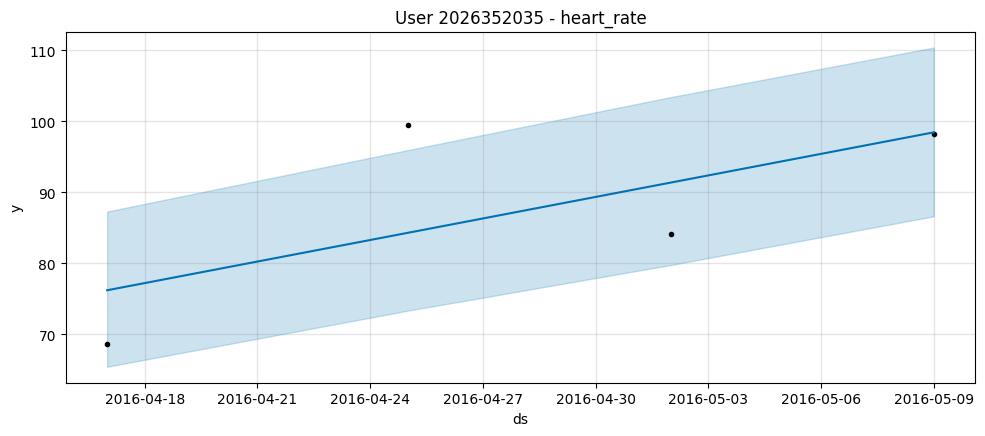

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 2.


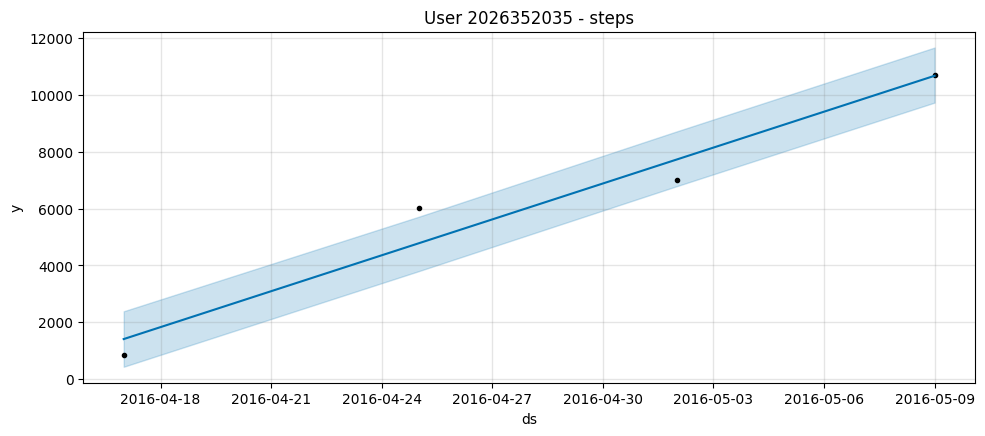

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 2.


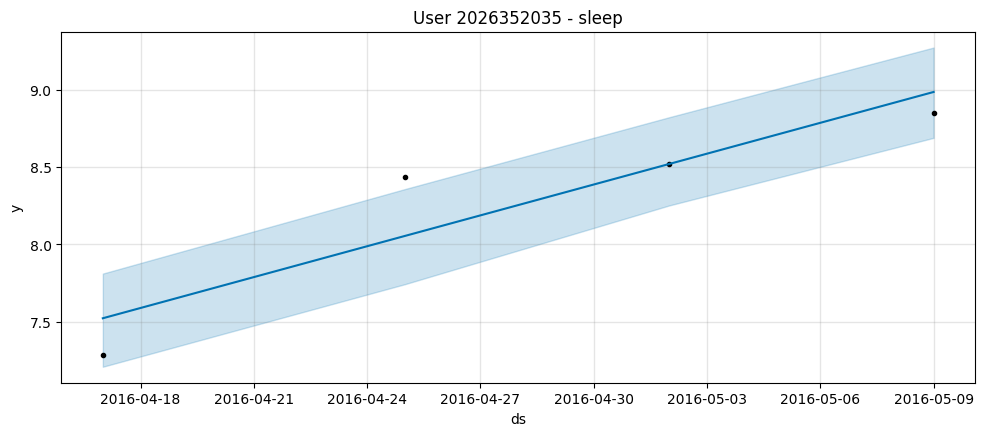

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.


Processing user: 2347167796


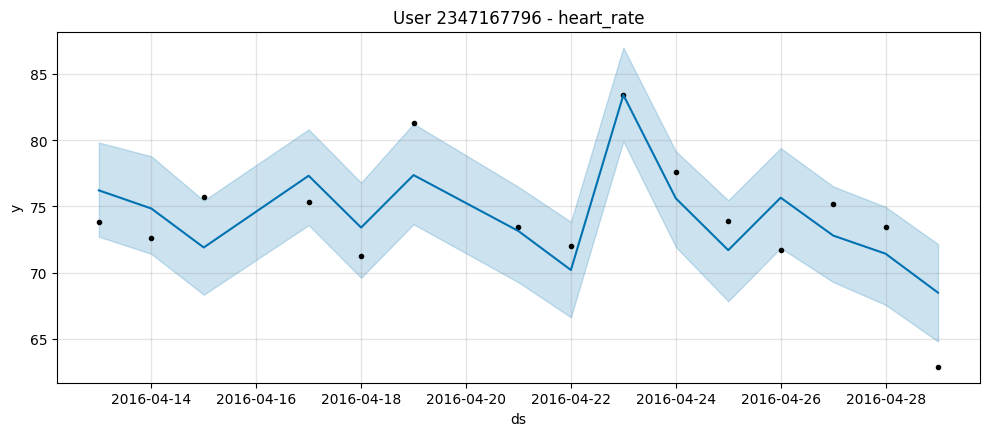

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.


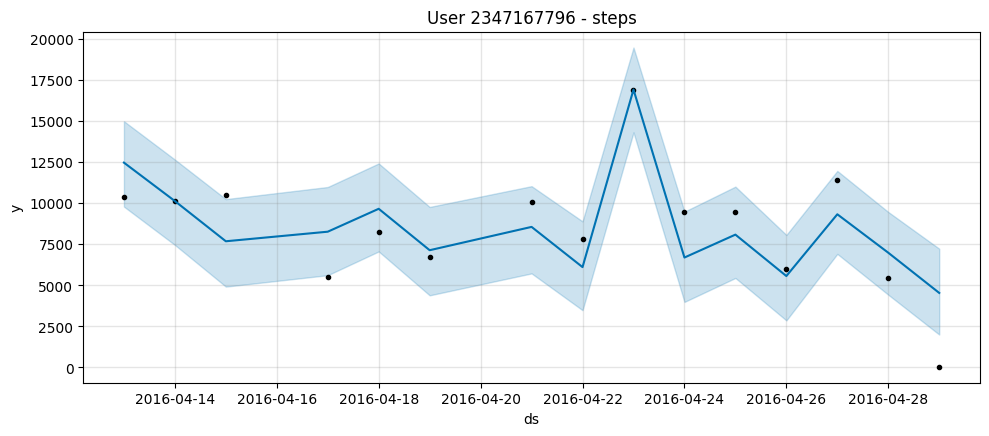

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.


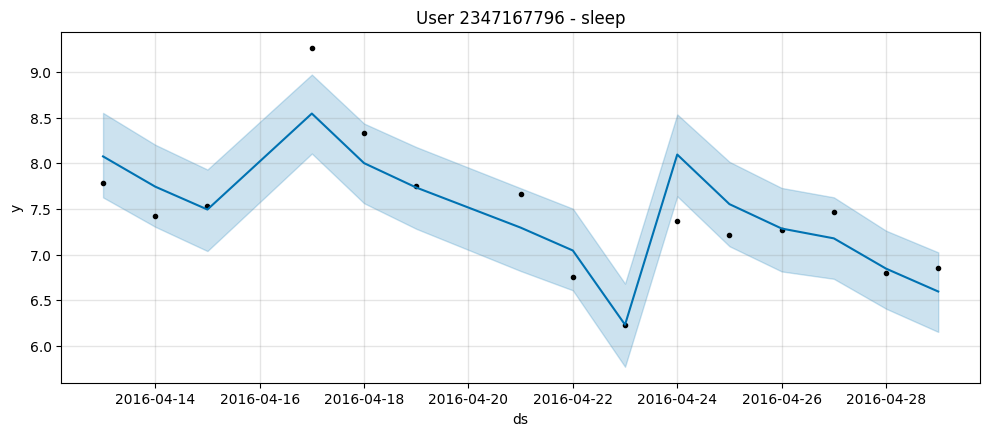

In [15]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt


# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Pick 2 unique users
selected_users = df['user_id'].unique()[:2]

metrics = ['heart_rate', 'steps', 'sleep']

for user in selected_users:
    user_data = df[df['user_id'] == user]
    print(f"Processing user: {user}")

    for metric in metrics:
        # Prepare data for Prophet
        df_prophet = user_data[['timestamp', metric]].rename(columns={'timestamp': 'ds', metric: 'y'})

        if df_prophet['y'].isnull().all():
            print(f"Skipping {metric}: No data")
            continue

        model = Prophet(daily_seasonality=True)
        model.fit(df_prophet)


        future = model.make_future_dataframe(periods=0)
        forecast = model.predict(future)

        # Plot
        fig = model.plot(forecast)
        fig.set_size_inches(10, 4)
        plt.title(f"User {user} - {metric}")
        plt.show()


KMEANS CLUSTERING

In [16]:
def run_clustering(features: pd.DataFrame) -> pd.DataFrame:
    df = features.copy()

    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.fillna(0)

    scaler = StandardScaler()
    X = scaler.fit_transform(df)

    n_components = min(2, X.shape[0] - 1)
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    n_clusters = min(3, X.shape[0])
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_pca)

    df["cluster"] = labels
    return df

clustered_features = run_clustering(features)
clustered_features.head()


,heart_rate__variance_larger_than_standard_deviation,heart_rate__has_duplicate_max,heart_rate__has_duplicate_min,heart_rate__has_duplicate,heart_rate__sum_values,heart_rate__abs_energy,heart_rate__mean_abs_change,heart_rate__mean_change,heart_rate__mean_second_derivative_central,heart_rate__median,...,sleep__fourier_entropy__bins_10,sleep__fourier_entropy__bins_100,sleep__permutation_entropy__dimension_3__tau_1,sleep__permutation_entropy__dimension_4__tau_1,sleep__permutation_entropy__dimension_5__tau_1,sleep__permutation_entropy__dimension_6__tau_1,sleep__permutation_entropy__dimension_7__tau_1,sleep__query_similarity_count__query_None__threshold_0.0,sleep__mean_n_absolute_max__number_of_maxima_7,cluster
2026352035,1.0,0.0,0.0,0.0,350.530536,31343.612942,20.106712,9.859217,-4.187558,91.184236,...,1.098612,1.098612,-0.000000,-0.000000,2.639057,2.754694,2.687639,0.0,8.832143,0
2347167796,1.0,0.0,0.0,0.0,1113.457715,82956.405998,4.792105,-0.781657,-0.357900,73.812905,...,1.213008,2.079442,1.671595,2.094729,2.271869,2.302585,2.197225,0.0,7.971429,2
4020332650,1.0,0.0,0.0,0.0,657.613850,54592.228993,9.411407,-1.554187,-1.902139,80.748614,...,1.332179,1.332179,1.560710,1.609438,1.386294,1.098612,0.693147,0.0,6.471429,0
4388161847,1.0,0.0,0.0,1.0,1577.610332,104435.875056,5.362032,-0.326042,-0.210339,64.139705,...,1.626021,2.458311,1.567236,2.227438,2.649159,2.944439,2.890372,0.0,8.800000,1
4558609924,1.0,0.0,0.0,0.0,433.266258,38185.924164,15.049021,4.802271,4.726092,85.662387,...,1.098612,1.098612,1.098612,0.693147,-0.000000,2.754694,2.687639,0.0,8.832143,0



PCA + DBSCAN


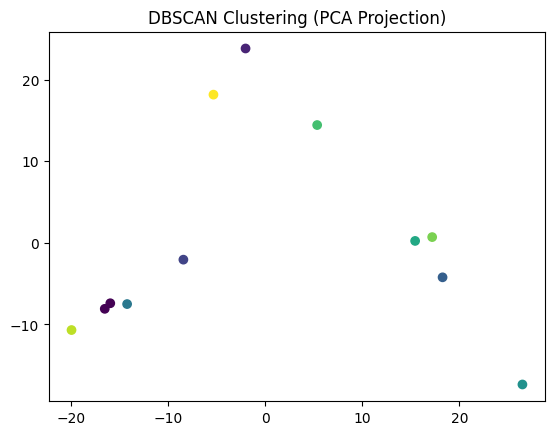

In [17]:
def run_pca(features, n_components=3):
    X = features.replace([np.inf, -np.inf], np.nan).fillna(0)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA(n_components=n_components, random_state=42)
    X_pca = pca.fit_transform(X_scaled)

    return X_pca, pca.explained_variance_ratio_

def run_dbscan(X_pca):
    dbscan = DBSCAN(eps=1.5, min_samples=1)
    labels = dbscan.fit_predict(X_pca)
    return labels

X_pca, var_ratio = run_pca(features)
db_labels = run_dbscan(X_pca)

plt.scatter(X_pca[:,0], X_pca[:,1], c=db_labels)
plt.title("DBSCAN Clustering (PCA Projection)")
plt.show()


In [18]:
!mkdir -p src data/raw data/processed results notebooks


In [19]:
%%writefile src/preprocessing.py
import pandas as pd

def preprocess_csv(input_path, output_path):
    df = pd.read_csv(input_path)
    df.columns = df.columns.str.lower().str.replace(" ", "_")
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
    df = df.dropna()
    df.to_csv(output_path, index=False)
    return df


Overwriting src/preprocessing.py


In [20]:
%%writefile src/feature_extraction.py
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute

def run_tsfresh(df, id_col, time_col):
    features = extract_features(
        df,
        column_id=id_col,
        column_sort=time_col
    )
    impute(features)
    return features


Overwriting src/feature_extraction.py


In [21]:
%%writefile src/modeling.py
from prophet import Prophet
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def prophet_model(df):
    model = Prophet(daily_seasonality=True)
    model.fit(df)
    future = model.make_future_dataframe(periods=30)
    return model.predict(future)


Overwriting src/modeling.py
